# Import needed libraries

In [62]:
# python library to perform numeric operations on numpy arrays
import numpy as np

# python library to process dataframe and do analysis on them
import pandas as pd

# !pip install xlrd
# python library to deal with excel files
import xlrd

# library to deal with directories effectively
import glob 

# convert categorical feature into numbers (specifically the ownerhip status)
from sklearn import preprocessing


import matplotlib.pyplot as plt
import seaborn as sns

## Read in and merge startup data files Christoph gave

In [2]:
# Using the Pandas python library
# Load the excel datafile
# Located in the data directory which is one directory above hence the ..


path = '../data/' # use your path

allFiles = glob.glob(path + "/*.xlsx") #  all excel files


frame = pd.DataFrame()
final = []

#  merge all excel files into one
for datafiles in allFiles:
    df = pd.read_excel(datafiles, skiprows=7, skip_footer=3)
    final.append(df)
    
pitchbk_data = pd.concat(final)

#  reset indices
pitchbk_data = pitchbk_data.reset_index(drop=True)

## Investigate merged dataset

In [3]:
# Display a verbose description of the dataset
# This includes number of columns, datatype of each column, how much memory the file takes up

pitchbk_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 130 columns):
Company ID                             object
Company Name                           object
Company Former Name                    object
Company Also Known As                  object
PBId                                   object
Description                            object
Primary Industry Sector                object
Primary Industry Group                 object
Primary Industry Code                  object
All Industries                         object
Industry Vertical                      object
Company Financing Status               object
Total Raised                           float64
Business Status                        object
Ownership Status                       object
Universe                               object
Website                                object
Employees                              float64
Exchange                               object
Ticker          

In [4]:
pitchbk_data

,Company ID,Company Name,Company Former Name,Company Also Known As,PBId,Description,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,Facebook Likes Change,Facebook Likes % Change,Majestic Referring Domains,Majestic Referring Domains Change,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Profile Data Source,PitchBook Link
0,61943-41,1001Pharmacies,NaN,NaN,61943-41,Owner and operator of an online pharmacy porta...,Healthcare,Pharmaceuticals and Biotechnology,Pharmaceuticals,Pharmaceuticals*; Internet Retail,...,1.199,"2,13%",1.677,27.0,"1,64%",4.354,10.0,"0,23%",PitchBook Research,NaN
1,126697-60,24Storage,NaN,NaN,126697-60,Provider of self storage platform and services...,Business Products and Services (B2B),Commercial Services,Logistics,Logistics*; Other Commercial Services,...,0.000,"0,00%",NaN,NaN,NaN,5,0.0,"0,00%",PitchBook Research,NaN
2,60359-86,2Can,NaN,NaN,60359-86,Developer of a mobile point of sale technology...,Information Technology,Software,Financial Software,Financial Software*; Application Software; Ver...,...,1.000,"0,03%",313.000,-1.0,"-0,32%",360,1.0,"0,28%",PitchBook Research,NaN
3,81674-02,360imprimir,NaN,NaN,81674-02,Provider of an online designing and printing p...,Information Technology,Software,Social/Platform Software,Social/Platform Software*,...,37.775,"9,58%",135.000,1.0,"0,75%",509,1.0,"0,20%",PitchBook Research,NaN
4,58634-74,3D Hubs,NaN,NaN,58634-74,Developer of a three dimensional printing prod...,Business Products and Services (B2B),Commercial Services,Printing Services (B2B),Printing Services (B2B)*; Social/Platform Soft...,...,56.000,"0,13%",5.801,7.0,"0,12%",25.151,64.0,"0,26%",PitchBook Research,NaN
5,172624-96,A Cloud Guru,NaN,acloudguru,172624-96,Operator of a cloud computing training platfor...,Information Technology,Software,Educational Software,Educational Software*; Environmental Services ...,...,40.000,"0,81%",8.000,-1.0,"-11,11%",13.207,159.0,"1,22%",PitchBook Research,NaN
6,108577-54,Acast,Acast Stories,NaN,108577-54,Provider of a curated platform designed to fac...,Information Technology,Software,Application Software,Application Software*; Entertainment Software;...,...,23.000,"0,75%",6.578,48.0,"0,74%",3.964,8.0,"0,20%",PitchBook Research,NaN
7,64576-81,AccessPay,NaN,NaN,64576-81,Developer of a cloud-based payment management ...,Information Technology,Software,Financial Software,Financial Software*; Other Financial Services,...,1.000,"0,61%",436.000,3.0,"0,69%",2.491,17.0,"0,69%",PitchBook Research,NaN
8,167047-57,Achilles Therapeutics,AchillesTx,NaN,167047-57,Developer of immunotherapies for cancer. The c...,Healthcare,Pharmaceuticals and Biotechnology,Biotechnology,Biotechnology*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,NaN
9,58006-72,Adbrain,NaN,NaN,58006-72,Developer of a data intelligence platform desi...,Business Products and Services (B2B),Commercial Services,Media and Information Services (B2B),Media and Information Services (B2B)*,...,0.000,"0,00%",248.000,-2.0,"-0,80%",1.566,0.0,"0,00%",PitchBook Research,NaN


Here, the Pitchbook data says that there are 1655 rows (entries), indexed from 0 to 1654.
In addition, there are 130 columns of different datatypes (many objects like strings (ie phrases or names), a good number of numeric values (floats) and a couple date and time formatted columns). 

The result of this information implies that some cleaning and encoding of the dataset will need to be done to present it in an effective structure for the Machine Learning algorithms later on.

Finally, the dataset takes up to ~1.5 MB (a thousandth of a Gigabyte).

In [5]:
# Display the dimension of the dataframe 
# which from the info above should be 1655 rows and 130 columns

pitchbk_data.shape

(1655, 130)

(1655,130) indicates that there are 1655 startups in the dataframe and 130 attributes/features about each startup.

In [6]:
# encode names correctly
list_col_names = [name.encode('utf-8') for name in pitchbk_data.columns.values]

# get first 20 features
print(list_col_names[:20])

['Company ID', 'Company Name', 'Company Former Name', 'Company Also Known As', 'PBId', 'Description', 'Primary Industry Sector', 'Primary Industry Group', 'Primary Industry Code', 'All Industries', 'Industry Vertical', 'Company Financing Status', 'Total Raised', 'Business Status', 'Ownership Status', 'Universe', 'Website', 'Employees', 'Exchange', 'Ticker']


In [7]:
pitchbk_data['Business Status'].unique()

array([u'Profitable', u'Generating Revenue', u'Startup',
       u'Clinical Trials - Phase 1', u'Product Development',
       u'Pre-Clinical Trials', u'Generating Revenue/Not Profitable',
       u'Product In Beta Test', u'Stealth', u'Clinical Trials - General',
       u'Clinical Trials - Phase 2', u'Bankruptcy: Admin/Reorg',
       u'Out of Business'], dtype=object)

In [8]:
pitchbk_data['Company Financing Status'].unique()

array([u'Venture Capital-Backed', u'Private Equity-Backed',
       u'Formerly VC-Backed', u'Angel-Backed',
       u'Accelerator/Incubator Backed', u'Corporate Backed or Acquired'], dtype=object)

In [9]:
pitchbk_data['Financing Status Note'] # news information about financial status

0       The company raised EUR 8 million of Series A v...
1       The company raised SEK 250 million of funding ...
2       The company raised $3 million of venture fundi...
3       The company raised EUR 4 million of Series B v...
4       The company raised $6.99 million of Series B v...
5       The company raised $7 million of Series A fund...
6       The company received an EUR 2.22 million grant...
7       The company received GBP 2 million of debt fin...
8       The company raised GBP 13.2 million of Series ...
9       The company raised $2 million of venture fundi...
10      The company raised $105 million of venture fun...
11      The company raised $17 million of venture fund...
12      The company raised $6 million of Series B vent...
13      Iris Capital Management sold its stake in the ...
14      The company received EUR 900,000 in grant fund...
15      The company raised $13 million of Series A ven...
16      The company raised EUR 10 million of venture f...
17      The co

In [10]:
pitchbk_data['Last Financing Deal Class'].unique()

array([u'Venture Capital', u'Other', u'Debt', u'Corporate', u'Individual',
       u'Private Equity', u'Out of Business', u'Public Investment',
       u'Bankruptcy'], dtype=object)

In [11]:
pitchbk_data['Ownership Status'].unique()

array([u'Privately Held (backing)',
       u'Acquired/Merged (Operating Subsidiary)', u'Acquired/Merged',
       u'Out of Business', u'Publicly Held'], dtype=object)

Ownership status appears to be a good label to do predictions on.

Before that though, I want to investigate the natural groupings/clusters present in the data and see what they might signify

## Pre-process/clean dataset

In [12]:
pitchbk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Columns: 130 entries, Company ID to PitchBook Link
dtypes: datetime64[ns](2), float64(37), object(91)
memory usage: 1.6+ MB


In [13]:
# first and last financing date are the datetime attributes
pitchbk_data.select_dtypes(['datetime64'])

,First Financing Date,Last Financing Date
0,2013-03-03,2015-07-09
1,2015-05-01,2017-02-20
2,2012-10-08,2017-07-25
3,2014-04-30,2017-04-24
4,2013-04-01,2016-07-13
5,2017-07-31,2017-07-31
6,2014-02-10,2017-07-03
7,2012-07-26,2017-04-13
8,2016-10-05,2016-10-05
9,2013-07-17,2017-05-22


In [14]:
# full procedure to convert objects to categorical for easy processing
pitchbk_data = pd.concat([
        pitchbk_data.select_dtypes([], ['object', 'datetime64']),
        pitchbk_data.select_dtypes(['object', 'datetime64']).apply(pd.Series.astype, dtype='category')
        ], axis=1).reindex_axis(pitchbk_data.columns, axis=1)


In [15]:
# get all non numeric attributes
category_features = pitchbk_data.select_dtypes(['category']).columns

In [16]:
label_name = pitchbk_data["Ownership Status"]
label_num = pitchbk_data["Ownership Status"].cat.codes

In [17]:
# encode categorical features
for feature in category_features:
    pitchbk_data[feature] = pitchbk_data[feature].cat.codes

In [18]:
np.sort(pitchbk_data['Company ID'].unique())

array([   0,    1,    2, ..., 1453, 1454, 1455])

1456 unique startups present out of the 1655 startups, showing that some startups may have some timescale of information added to the dataset, this could help understand how startup features change from one time point to another

In [19]:
#axis=1 relates to columns
# if all values in a column are NaN, the column is dropped
clean_numpitchbk = pitchbk_data.dropna(axis=1, how='all')

In [20]:
pitchbk_data.columns[pitchbk_data.isnull().all()].tolist()

[u'First Financing Deal Type 3',
 u'First Financing Debt Type 3',
 u'Last Financing Deal Type 3',
 u'Last Financing Debt Type 3',
 u'PitchBook Link']

These 5 colums are dropped as they contain null values throughout their columns

In [21]:
clean_numpitchbk

,Company ID,Company Name,Company Former Name,Company Also Known As,PBId,Description,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,Facebook Likes,Facebook Likes Change,Facebook Likes % Change,Majestic Referring Domains,Majestic Referring Domains Change,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Profile Data Source
0,1195,1,-1,-1,1195,844,4,28,113,725,...,909,1.199,230,1.677,27.0,377,358,10.0,112,0
1,302,4,-1,-1,302,1439,0,5,75,540,...,984,0.000,32,NaN,NaN,-1,390,0.0,89,0
2,1159,5,-1,-1,1159,237,5,33,51,389,...,644,1.000,35,313.000,-1.0,20,746,1.0,117,0
3,1285,8,-1,-1,1285,1178,5,33,125,755,...,809,37.775,363,135.000,1.0,318,819,1.0,109,0
4,1122,9,-1,-1,1122,335,0,5,114,728,...,803,56.000,45,5.801,7.0,272,527,64.0,115,0
5,699,18,-1,210,699,715,5,33,36,305,...,793,40.000,112,8.000,-1.0,149,482,159.0,206,0
6,122,25,1,-1,122,939,5,33,6,49,...,647,23.000,106,6.578,48.0,317,330,8.0,109,0
7,1247,26,-1,-1,1247,118,5,33,51,410,...,436,1.000,93,436.000,3.0,313,239,17.0,158,0
8,540,27,2,-1,540,560,4,28,14,143,...,-1,NaN,-1,NaN,NaN,-1,-1,NaN,-1,0
9,1107,35,-1,-1,1107,141,0,5,80,547,...,336,0.000,32,248.000,-2.0,60,111,0.0,89,0


3 rows were dropped (503-500)

In [22]:
for idx, elem in enumerate((clean_numpitchbk == clean_numpitchbk.iloc[0]).all()):
    if elem == True:
        print clean_numpitchbk.columns[idx]

HQ Global Region
Profile Data Source


In [23]:
# remove columns with just a constant value
clean_numpitchbk = clean_numpitchbk.loc[:, (clean_numpitchbk == clean_numpitchbk.iloc[0]).any()] 

2 columns were deleted as they had constant features: HQ Global Region and Profile Data Source. This is because all startups are within the european region. In addition, the Profile Data Source is just filled with the text "PitchBook Research"

This is a possible class label (to be discussed with Earlybird)

Due to the class imbalance I am not going to use accuracy as the way to evaluate the performance of the classifier I end up using (for now)

For now Im going to set all NaN to the mean of the values in a feature/column

In [24]:
clean_numpitchbk = clean_numpitchbk.fillna(clean_numpitchbk.mean())

## Normalising data (by making features have a similar mean and variance) - store for now to see if performance improves later

In [25]:
df = clean_numpitchbk

# subtract each attribute by its mean
# divide by its standard deviation
normalised_numpitchbk = (df-df.mean()) / (df.std())

This dataset currently has 1655 samples and 125 features

## Investigate different clustering and dimensionality reduction techniques to visualise and understand data

In [50]:
from __future__ import print_function, division
%matplotlib inline

import collections


from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold

In [51]:
clean_numpitchbk.describe()

,Company ID,Company Name,Company Former Name,Company Also Known As,PBId,Description,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,Facebook Likes,Facebook Likes Change,Facebook Likes % Change,Majestic Referring Domains,Majestic Referring Domains Change,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Profile Data Source
count,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,...,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.0
mean,721.677946,725.709970,7.841088,15.240483,721.677946,734.694864,3.511178,24.694260,53.645317,387.701511,...,418.330514,49.889709,75.862236,142.755996,1.413844,204.073716,482.352870,12.462085,116.997583,0.0
std,423.861838,420.420618,29.335911,46.151309,423.861838,429.204322,1.956841,11.046874,40.669271,246.868463,...,368.532716,117.999268,90.718650,176.301107,25.027571,143.628895,359.187463,48.308632,95.963346,0.0
min,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-802.000000,-1.000000,1.000000,-342.000000,-1.000000,-1.000000,-428.000000,-1.000000,0.0
25%,355.500000,361.500000,-1.000000,-1.000000,355.500000,363.500000,1.000000,16.000000,19.000000,173.000000,...,-1.000000,1.000000,-1.000000,25.000000,-1.000000,60.500000,131.500000,0.000000,33.500000,0.0
50%,712.000000,727.000000,-1.000000,-1.000000,712.000000,733.000000,5.000000,33.000000,49.000000,378.000000,...,374.000000,12.000000,40.000000,94.000000,0.000000,266.000000,495.000000,4.000000,102.000000,0.0
75%,1098.500000,1089.000000,-1.000000,-1.000000,1098.500000,1109.500000,5.000000,33.000000,86.500000,594.500000,...,737.500000,49.889709,106.000000,146.500000,1.413844,266.000000,783.000000,12.462085,162.000000,0.0
max,1455.000000,1460.000000,159.000000,217.000000,1455.000000,1479.000000,6.000000,35.000000,138.000000,861.000000,...,1116.000000,979.000000,365.000000,986.000000,808.000000,513.000000,1147.000000,718.000000,394.000000,0.0


In [52]:
X = clean_numpitchbk.drop(labels=["Ownership Status"], axis=1, inplace=False)

# remember label_name and label_num
# categories
cats = label_name.unique()

# y is a vector of categories
y = np.array(cats)[label_num]

# K Means

In [53]:
# see how well k means groups the data into the corresponding labels

In [54]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [55]:
mean_data_point = X.mean()
num_datapts = X.shape[0]

distance_to_mean_each_dim = X-mean_data_point
distance_to_mean = np.linalg.norm(distance_to_mean_each_dim, axis=1)
mean_distance_to_mean = sum(distance_to_mean)/float(num_datapts)
print("The average distance of a datapoint from the 'centre': {}".format(mean_distance_to_mean))

The average distance of a datapoint from the 'centre': 2048.47130717


In [56]:
print("The inertia of this kmeans model : {}".format(kmeans.inertia_))

The inertia of this kmeans model : 5745229664.82


In [57]:
print("The adjusted rand index of this kmeans model : {}".format(adjusted_rand_score(y, kmeans.labels_)))

The adjusted rand index of this kmeans model : 0.00104487078993


1.
Intertia measures sum of the squared distances of points to their closest cluster centre across all clusters. Adjusted rand score is the rand index (relative to random cluster assignments), where the rand index measures how similar two groups of cluster assignments are  to each other.


2.
The goal is to have inertia as low as possible (best when equal to 0) and the adjusted rand score as close to 1 which implies perfect cluster matching/similarity. Also, note that an adjusted rand score of 0 implies random and -1 implies a bad matching.

As a result of the adjusted rand score being greater than 0, it shows that the clustering is better than random but its not too great as the value is not close to 1. In fact it is closer to the random assignment and the inertia further backs up the lack of confidence made in this clustering, although it should be mentioned that the dimensionality being considered here are a 119 dimensions.

In [58]:
y_df = pd.DataFrame(y, columns=["class label"])

print("Number of datapoints within each class (true) label: ")
y_df["class label"].value_counts()

Number of datapoints within each class (true) label: 


Out of Business                           1639
Acquired/Merged (Operating Subsidiary)       7
Privately Held (backing)                     4
Publicly Held                                3
Acquired/Merged                              2
Name: class label, dtype: int64

In [59]:
print("Number of datapoints within each cluster generated by kmeans:")

collections.Counter(kmeans.labels_)


Number of datapoints within each cluster generated by kmeans:


Counter({0: 314, 1: 303, 2: 234, 3: 455, 4: 349})

Currently bad at clustering into the proper groups which is to be expected as a result of the huge class imbalance

In [60]:
num_clusters = kmeans.n_clusters
cluster_names = ["cluster 1", "cluster 2", "cluster 3", "cluster 4", "cluster 5"]

distance_matrix = np.zeros((num_clusters, num_clusters))

centers = kmeans.cluster_centers_


for idx_center_i, center_i in enumerate(kmeans.cluster_centers_):
    for idx_center_j, center_j in enumerate(kmeans.cluster_centers_):
        distance_matrix[idx_center_i, idx_center_j] = np.linalg.norm(center_i-center_j)
        

print("Distance from one cluster centre to another")
pd.DataFrame(distance_matrix, index=cluster_names, columns=cluster_names)


Distance from one cluster centre to another


,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
cluster 1,0.000000,1150.579195,1473.063287,1466.032683,1207.427900
cluster 2,1150.579195,0.000000,1349.856427,1512.551524,1227.256255
cluster 3,1473.063287,1349.856427,0.000000,1649.881619,1482.684387
cluster 4,1466.032683,1512.551524,1649.881619,0.000000,1384.932388
cluster 5,1207.427900,1227.256255,1482.684387,1384.932388,0.000000


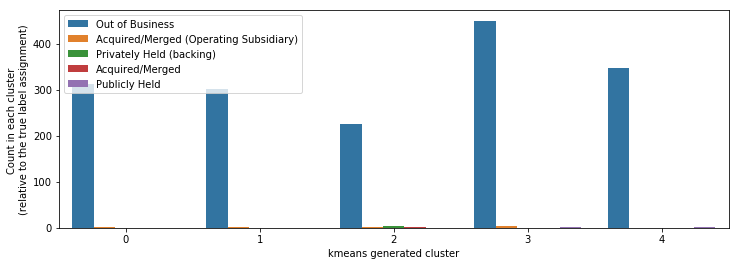

In [63]:
plt.figure(figsize=(12,4))

sns.countplot(kmeans.labels_, hue=y)
plt.xlabel("kmeans generated cluster")
plt.ylabel("Count in each cluster \n(relative to the true label assignment)")

plt.legend(loc=2)

plt.show()

# PCA

In [32]:
pca = PCA(n_components=2, random_state=0)
X_2d = pca.fit_transform(X)

In [65]:
# number of components
n_components = [1,2,3,5,10,20,50,100]

# initialise adjusted rand score container
adjusted_rand_array = np.zeros(len(n_components))



for idx, components_num in enumerate(n_components):
    
    # initialise pca
    pca = PCA(components_num, random_state=0) # random state set to ensure reproducibility
    X_pca = pca.fit_transform(X)
    
    # initialise k means
    kmeans = KMeans(n_clusters=5, random_state=0)
    kmeans.fit(X_pca)
    
    
    # print statements to see performance
    inertia = kmeans.inertia_
    print("inertia is {} for {} component(s)".format(inertia, components_num))
    
    rand_score = adjusted_rand_score(y, kmeans.labels_)
    print("adjusted rand score is {} for {} component(s)".format(rand_score, components_num))
    
    adjusted_rand_array[idx] = rand_score
    print("\n")

    

inertia is 47643376.4631 for 1 component(s)
adjusted rand score is -0.000596477143142 for 1 component(s)


inertia is 328352375.168 for 2 component(s)
adjusted rand score is 0.00122298034993 for 2 component(s)


inertia is 715364985.692 for 3 component(s)
adjusted rand score is -0.000169269506635 for 3 component(s)


inertia is 1686645821.5 for 5 component(s)
adjusted rand score is 0.000859813334468 for 5 component(s)


inertia is 3236092818.67 for 10 component(s)
adjusted rand score is 0.00101163531147 for 10 component(s)


inertia is 4804905255.35 for 20 component(s)
adjusted rand score is 0.000774605197539 for 20 component(s)


inertia is 5727511139.94 for 50 component(s)
adjusted rand score is 0.000907926873846 for 50 component(s)


inertia is 5745227673.06 for 100 component(s)
adjusted rand score is 0.00104487078993 for 100 component(s)




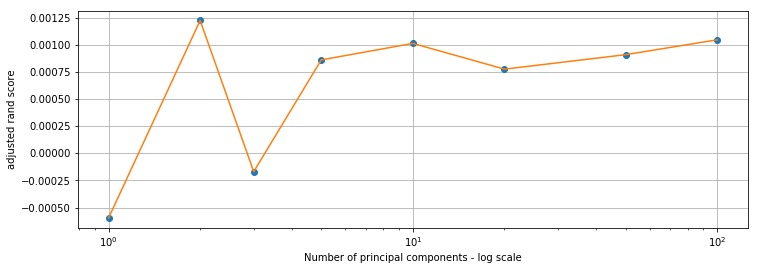

In [66]:
# ACTUAL PLOT
plt.figure(figsize=(12,4))

plt.plot(n_components,adjusted_rand_array, "o") # get points
plt.semilogx(n_components, adjusted_rand_array) # log scale and line


plt.ylabel('adjusted rand score')
plt.xlabel('Number of principal components - log scale')
plt.grid()

plt.show()

# K means and pca

In [67]:
pca = PCA(n_components=2, random_state=0)
X_2d = pca.fit_transform(X)

In [68]:
kmeans_pca = KMeans(n_clusters=5, random_state=0)
kmeans_pca.fit(X_2d)

rand_score = adjusted_rand_score(y, kmeans_pca.labels_)
print("adjusted rand score for k means with a PCA transformed dataset is {}".format(rand_score))

adjusted rand score for k means with a PCA transformed dataset is 0.00122298034993


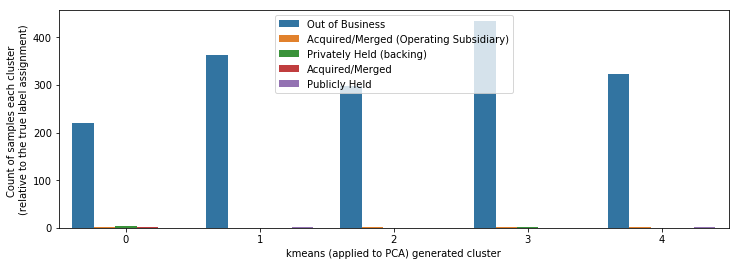

Number of datapoints within each cluster: 


Counter({0: 227, 1: 365, 2: 299, 3: 438, 4: 326})

In [72]:
plt.figure(figsize=(12,4))


sns.countplot(kmeans_pca.labels_, hue=y)
plt.xlabel("kmeans (applied to PCA) generated cluster")
plt.ylabel("Count of samples each cluster \n(relative to the true label assignment)")


plt.legend(loc=9)
plt.show()

print("Number of datapoints within each cluster: ")
collections.Counter(kmeans_pca.labels_)

# Added steps

Class imbalance needs to be dealt with but for now just to have a look at the confusion matrix I will do the following cluster assignments

In [73]:
# by looking at majority (true label) in each generated cluster
cluster_0 = "Acquired/Merged"
cluster_1 = "Out of Business"
cluster_2 = "Acquired/Merged (Operating Subsidiary)"
cluster_3 = "Privately Held (backing)"
cluster_4 = "Publicly Held"

cluster_names = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4]

labels_interp = np.array(cluster_names)[kmeans_pca.labels_]

In [ ]:
def plot_confusion_matrix(cm, title, classes=None):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.xlabel('Predictions (model)')
    plt.ylabel('Truth')


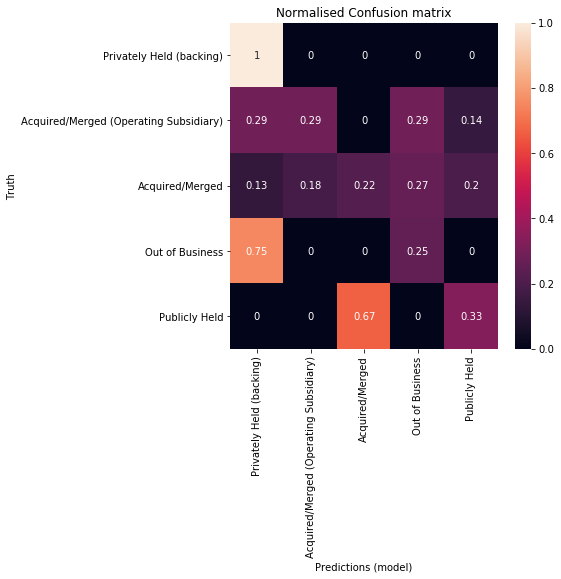

In [79]:
# construct confusion matrix

plt.figure(figsize=(10,10))
conf_matrix = confusion_matrix(y_true=y, y_pred=labels_interp)

sum_conf_matrix = np.sum(conf_matrix, axis=1)[:,None]

normalised_conf_matrix = conf_matrix/sum_conf_matrix

# plotting confusion matrix

plt.figure(figsize=(6,6))
plot_confusion_matrix(cm=normalised_conf_matrix, title='Normalised Confusion matrix', classes=cats)


Not really representative

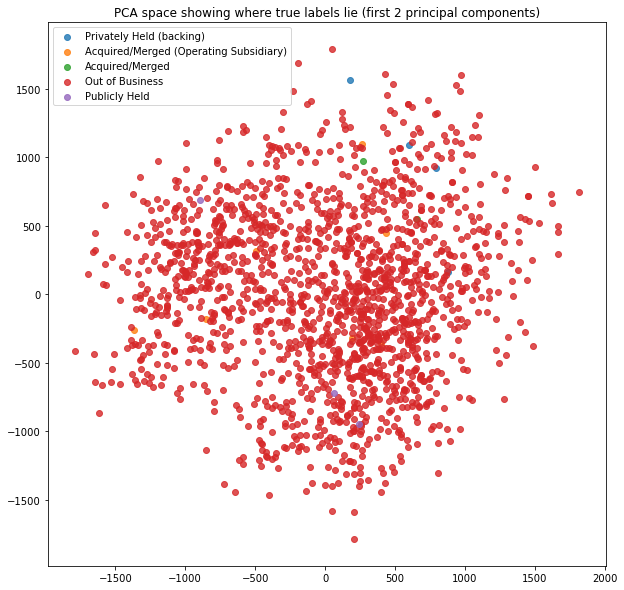

In [78]:
plt.figure(figsize=(10,10))

target_names = cats


for i, target_name in zip([0, 1, 2, 3, 4], target_names):
    plt.scatter(
        x = X_2d[y == target_names[i],0], 
        y = X_2d[y == target_names[i],1], 
        alpha=.8, 
        label=target_name
)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('PCA space showing where true labels lie (first 2 principal components)')

plt.show()